## **Tratamento dos dados**

TODO - escrever introdução sobre o processo de transformação dos dados

### Dataframes

- Vagas
- Prospects
- Applicants

In [ ]:
!pip install pandas numpy seaborn matplotlib scikit-learn


In [242]:
import pandas as pd
from ast import literal_eval
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

### **Importando e tratando os dataframes**

#### Vagas

In [85]:
df_vagas = pd.read_json('../dados/vagas.json', convert_dates=False)
df_vagas.head()

,5185,5184,5183,5182,5181,5180,5179,5178,5177,5176,...,12373,12372,12371,12370,12369,12368,12367,12366,12365,12364
informacoes_basicas,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...","{'data_requicisao': '04-05-2021', 'limite_espe...",...,"{'data_requicisao': '29-02-2024', 'limite_espe...","{'data_requicisao': '29-02-2024', 'limite_espe...","{'data_requicisao': '29-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '28-02-2024', 'limite_espe...","{'data_requicisao': '27-02-2024', 'limite_espe...","{'data_requicisao': '27-02-2024', 'limite_espe...","{'data_requicisao': '27-02-2024', 'limite_espe..."
perfil_vaga,"{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'Paraná', 'cidade...",...,"{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid..."
beneficios,"{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '- p/ mês (168h)', 'valor_comp...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",...,"{'valor_venda': '270,00 -', 'valor_compra_1': ...","{'valor_venda': '2.300,00 -', 'valor_compra_1'...","{'valor_venda': '168 -', 'valor_compra_1': 'Ab...","{'valor_venda': '78,00 - p/ hora', 'valor_comp...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '123,00 -', 'valor_compra_1': ...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe...","{'valor_venda': '168 -', 'valor_compra_1': 'Fe..."


In [86]:
df_vagas = df_vagas.T
df_vagas["id_vaga"] = df_vagas.index.values
df_vagas.sort_values(by=['id_vaga'], inplace=True)
df_vagas.reset_index(inplace=True, drop=True)
df_vagas.head()

,informacoes_basicas,perfil_vaga,beneficios,id_vaga
0,"{'data_requicisao': '02-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '- p/ mês (168h)', 'valor_comp...",2
1,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'Paraná', 'cidade...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",3
2,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'Paraná', 'cidade...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",4
3,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",5
4,"{'data_requicisao': '04-12-2018', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'hora',...",6


In [87]:
df_vagas.shape

(14081, 4)

In [88]:
df_vagas_info_normalized = pd.json_normalize(df_vagas['informacoes_basicas'])
df_vagas_perfil_normalized = pd.json_normalize(df_vagas['perfil_vaga'])
df_vagas_beneficios_normalized = pd.json_normalize(df_vagas['beneficios'])

df_vagas_normalized = pd.concat([df_vagas["id_vaga"], df_vagas_info_normalized, df_vagas_perfil_normalized, df_vagas_beneficios_normalized], axis=1)
df_vagas_normalized.head()

,id_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,habilidades_comportamentais_necessarias,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2
0,2,02-12-2018,00-00-0000,Analista de Negocios SR,Não,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,NaN,- p/ mês (168h),Mês 168,
1,3,04-12-2018,00-00-0000,Arquiteto de Sistemas SR,Não,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,NaN,-,hora,
2,4,04-12-2018,00-00-0000,Analista de Projetos SR,Não,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,NaN,-,hora,
3,5,04-12-2018,00-00-0000,Analista de Sistemas SR,Não,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,NaN,-,hora,
4,6,04-12-2018,00-00-0000,Analista de Sistemas SR,Não,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,NaN,-,hora,


In [89]:
df_vagas_normalized.shape

(14081, 45)

In [90]:
df_vagas_normalized.isnull().sum()

id_vaga                                        0
data_requicisao                                0
limite_esperado_para_contratacao               0
titulo_vaga                                    0
vaga_sap                                       0
cliente                                        0
solicitante_cliente                            0
empresa_divisao                                0
requisitante                                   0
analista_responsavel                           0
tipo_contratacao                               0
prazo_contratacao                              0
data_inicial                                9625
data_final                                  9625
objetivo_vaga                                  0
prioridade_vaga                                0
origem_vaga                                    0
superior_imediato                             42
nome                                        4456
telefone                                    4762
nome_substituto     

In [91]:
df_vagas_normalized = df_vagas_normalized.fillna('')
df_vagas_normalized["limite_esperado_para_contratacao"] = df_vagas_normalized["limite_esperado_para_contratacao"].replace({'00-00-0000': ''})
df_vagas_normalized["vaga_sap"] = df_vagas_normalized["vaga_sap"].replace({'Não': 0, 'Sim': 1})

In [92]:
df_vagas_normalized.head()

,id_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,habilidades_comportamentais_necessarias,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,,- p/ mês (168h),Mês 168,
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,,-,hora,
2,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,,-,hora,
3,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,,-,hora,
4,6,04-12-2018,,Analista de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,,-,hora,


#### Prospects

In [93]:
df_prospects = pd.read_json('../dados/prospects.json', convert_dates=False)
df_prospects.head()

,4530,4531,4532,4533,4534,4535,4536,4537,4538,4539,...,14213,14214,14215,14216,14217,14218,14219,14220,14221,14222
titulo,CONSULTOR CONTROL M,2021-2607395-PeopleSoft Application Engine-Dom...,,2021-2605708-Microfocus Application Life Cycle...,2021-2605711-Microfocus QTP - UFT Automation T...,Microfocus QTP - UFT Automation Testing-Lead-2...,Gestão De Incidentes Field Support - 11755457,PMO Practitioner - 11744940,,,...,,,,,SAP SD,Java Support Analyst,,Consultor Sênior Especialista SAP LES-TRA - 1433,Consultor Sênior Oracle EPM FCCS - 1434,
modalidade,,,,,,CLT,,,,,...,,,,,,,,,,
prospects,"[{'nome': 'José Vieira', 'codigo': '25632', 's...","[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '...",[],"[{'nome': 'Arthur Almeida', 'codigo': '26338',...","[{'nome': 'Ana Luiza Vieira', 'codigo': '26361...","[{'nome': 'Arthur Almeida', 'codigo': '26338',...","[{'nome': 'Sr. Cauã Vargas', 'codigo': '25362'...","[{'nome': 'Bárbara Nascimento', 'codigo': '252...",[],[],...,[],[],[],[],"[{'nome': 'Laís Duarte', 'codigo': '49670', 's...","[{'nome': 'Dr. Vitor Hugo Silva', 'codigo': '4...",[],"[{'nome': 'Ana Cardoso', 'codigo': '16828', 's...","[{'nome': 'Maria Eduarda Cassiano', 'codigo': ...",[]


In [94]:
df_prospects = df_prospects.T
df_prospects["id_vaga"] = df_prospects.index.values
df_prospects.sort_values(by=['id_vaga'], inplace=True)
df_prospects.reset_index(inplace=True, drop=True)
df_prospects.head()

,titulo,modalidade,prospects,id_vaga
0,,,[],0
1,,,[],1
2,Analista de Negocios SR,Cooperado,"[{'nome': 'Luiz Felipe Costela', 'codigo': '12...",2
3,Arquiteto de Sistemas SR,,"[{'nome': 'Sr. Luiz Fernando Fernandes', 'codi...",3
4,Analista de Projetos SR,,"[{'nome': 'Dra. Kamilly Nascimento', 'codigo':...",4


In [95]:
s = df_prospects.apply(lambda x: pd.Series(x['prospects']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'candidato'
df_stacked_prospects = df_prospects.drop('prospects', axis=1).join(s)
df_stacked_prospects.head(10)

,titulo,modalidade,id_vaga,candidato
0,,,0,NaN
1,,,1,NaN
2,Analista de Negocios SR,Cooperado,2,"{'nome': 'Luiz Felipe Costela', 'codigo': '125..."
3,Arquiteto de Sistemas SR,,3,"{'nome': 'Sr. Luiz Fernando Fernandes', 'codig..."
3,Arquiteto de Sistemas SR,,3,"{'nome': 'Dra. Allana Pacheco', 'codigo': '125..."
4,Analista de Projetos SR,,4,"{'nome': 'Dra. Kamilly Nascimento', 'codigo': ..."
5,Analista de Sistemas SR,,5,"{'nome': 'Luiz Felipe Moraes', 'codigo': '1262..."
5,Analista de Sistemas SR,,5,"{'nome': 'Dra. Aylla Monteiro', 'codigo': '126..."
5,Analista de Sistemas SR,,5,"{'nome': 'Cauê Teixeira', 'codigo': '11299', '..."
6,,,6,NaN


In [96]:
df_stacked_prospects.shape

(56702, 4)

In [97]:
df_stacked_prospects.isnull().sum()

titulo           0
modalidade       0
id_vaga          0
candidato     2943
dtype: int64

In [98]:
df_stacked_prospects.dropna(inplace=True)
df_stacked_prospects.reset_index(inplace=True, drop=True)

In [99]:
df_stacked_prospects.shape

(53759, 4)

In [100]:
df_prospects_list_normalized = pd.json_normalize(df_stacked_prospects['candidato'])
df_prospects_list_normalized = df_prospects_list_normalized.rename(columns={"codigo": "codigo_candidato"})
df_prospects_list_normalized["codigo_candidato"] = df_prospects_list_normalized["codigo_candidato"].apply(literal_eval)

df_prospects_normalized = pd.concat(
    [df_stacked_prospects["id_vaga"], 
     df_stacked_prospects["titulo"], 
     df_stacked_prospects["modalidade"], 
     df_prospects_list_normalized], axis=1)
df_prospects_normalized.head(10)

,id_vaga,titulo,modalidade,nome,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,2,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,12585,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros
1,3,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,12598,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
2,3,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,12595,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão
3,4,Analista de Projetos SR,,Dra. Kamilly Nascimento,12618,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão
4,5,Analista de Sistemas SR,,Luiz Felipe Moraes,12626,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas
5,5,Analista de Sistemas SR,,Dra. Aylla Monteiro,12624,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas
6,5,Analista de Sistemas SR,,Cauê Teixeira,11299,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
7,7,DBA SR,,Vitória da Cruz,12609,Inscrito,07-12-2018,,,Caroline Machado
8,7,DBA SR,,Luiz Felipe Porto,10086,Inscrito,13-12-2018,,,Caroline Machado
9,8,Analista Desenvolvedor,,Marina Peixoto,6729,Desistiu,07-12-2018,12-12-2018,,Liz Freitas


In [101]:
df_prospects_normalized.isnull().sum()

id_vaga               0
titulo                0
modalidade            0
nome                  0
codigo_candidato      0
situacao_candidado    0
data_candidatura      0
ultima_atualizacao    0
comentario            0
recrutador            0
dtype: int64

#### Applicants

In [102]:
df_applicants = pd.read_json('../dados/applicants.json', convert_dates=False)
df_applicants.head()

,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
infos_basicas,"{'telefone_recado': '', 'telefone': '(11) 9704...","{'telefone_recado': '', 'telefone': '(11) 9372...","{'telefone_recado': '', 'telefone': '(11) 9239...","{'telefone_recado': '', 'telefone': '(11) 9810...","{'telefone_recado': '', 'telefone': '(11) 9251...","{'telefone_recado': '', 'telefone': '(11) 9498...","{'telefone_recado': '', 'telefone': '(11) 9484...","{'telefone_recado': '', 'telefone': '(31) 9986...","{'telefone_recado': '', 'telefone': '(11) 9288...","{'telefone_recado': '', 'telefone': '(11) 9535...",...,"{'telefone_recado': '', 'telefone': '(11) 9524...","{'telefone_recado': '', 'telefone': '(11) 9236...","{'telefone_recado': '', 'telefone': '(11) 9135...","{'telefone_recado': '', 'telefone': '(34) 9716...","{'telefone_recado': '', 'telefone': '(48) 9236...","{'telefone_recado': '', 'telefone': '(11) 9262...","{'telefone_recado': '', 'telefone': '(41) 9300...","{'telefone_recado': '', 'telefone': '(11) 9783...","{'telefone_recado': '', 'telefone': '(61) 9680...","{'telefone_recado': '', 'telefone': '(15) 9563..."
informacoes_pessoais,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...,{'data_aceite': 'Cadastro anterior ao registro...
informacoes_profissionais,"{'titulo_profissional': '', 'area_atuacao': ''...",{'titulo_profissional': 'Analista Administrati...,{'titulo_profissional': 'Administrativo | Fina...,"{'titulo_profissional': 'Área administrativa',...","{'titulo_profissional': '', 'area_atuacao': ''...",{'titulo_profissional': 'Administrativa/logíst...,{'titulo_profissional': 'Analista Administrati...,{'titulo_profissional': 'Desejo fazer parte do...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'titulo_profissional': '', 'area_atuacao': ''...",...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...",{'titulo_profissional': 'Crm / Líder de Projet...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':...","{'titulo_profissional': 'Crm', 'area_atuacao':..."
formacao_e_idiomas,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{'nivel_academico': 'Ensino Superior Incomplet...,{'nivel_academico': 'Ensino Superior Completo'...,{'nivel_academico': 'Ensino Superior Incomplet...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': 'Ensino Técnico Completo',...",{'nivel_academico': 'Ensino Superior Cursando'...,{'nivel_academico': 'Ensino Superior Completo'...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'

In [103]:
df_applicants = df_applicants.T
df_applicants["codigo_candidato"] = df_applicants.index.values
df_applicants.sort_values(by=['codigo_candidato'], inplace=True)
df_applicants.reset_index(inplace=True, drop=True)
df_applicants.head()

,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,codigo_candidato
0,"{'telefone_recado': '', 'telefone': '', 'objet...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...","{'id_ibrati': '', 'email_corporativo': '', 'ca...",,,0
1,"{'telefone_recado': '', 'telefone': '(11) 9988...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Consultor ABAP', 'are...",{'nivel_academico': 'Ensino Superior Completo'...,"{'id_ibrati': '', 'email_corporativo': '', 'ca...","\nexperiência em análise, desenvolvimento e im...",,1
2,"{'telefone_recado': '', 'telefone': '(11) 9671...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Consultor ABAP', 'are...",{'nivel_academico': 'Ensino Superior Completo'...,{},\n,,2
3,"{'telefone_recado': '', 'telefone': '(11) 9551...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Analista de BI', 'are...",{'nivel_academico': 'Ensino Superior Completo'...,{},\n,,3
4,"{'telefone_recado': '', 'telefone': '(11) 9129...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista/Coordenador ...,"{'nivel_academico': 'Pós Graduação Completo', ...",{},,,4


In [104]:
df_applicants_info_basic_normalized = pd.json_normalize(df_applicants['infos_basicas'])
df_applicants_info_pessoa_normalized = pd.json_normalize(df_applicants['informacoes_pessoais'])
df_applicants_info_prof_normalized = pd.json_normalize(df_applicants['informacoes_profissionais'])
df_applicants_formacao_normalized = pd.json_normalize(df_applicants['formacao_e_idiomas'])
df_applicants_cargo_normalized = pd.json_normalize(df_applicants['cargo_atual'])

df_applicants_normalized = pd.concat(
    [df_applicants["codigo_candidato"], 
     df_applicants["cv_pt"], 
     df_applicants["cv_en"], 
     df_applicants_info_basic_normalized, 
     df_applicants_info_pessoa_normalized, 
     df_applicants_info_prof_normalized, 
     df_applicants_formacao_normalized, 
     df_applicants_cargo_normalized], axis=1)
df_applicants_normalized.head()

,codigo_candidato,cv_pt,cv_en,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,...,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,0,,,,,,,pelo próprio candidato,heitor_melo@gmail.com,,...,,,,,,,,,,
1,1,"\nexperiência em análise, desenvolvimento e im...",,,(11) 99889-8296,Consultor ABAP,21-08-2017 14:16:35,pelo próprio candidato,nicole_fogaça@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
2,2,\n,,,(11) 96713-5737,Consultor ABAP,21-08-2017 14:30:47,pelo próprio candidato,ana_julia_marques@hotmail.com,"São Paulo, São Paulo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,,,,(11) 91292-1764,Analista/Coordenador de Ti,22-08-2017 14:09:41,pelo próprio candidato,catarina_pacheco@gmail.com,"Ribeirão Pires, São Paulo",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_applicants_normalized.shape

(42482, 58)

In [106]:
df_applicants_normalized.isnull().sum()

codigo_candidato                   0
cv_pt                              0
cv_en                              0
telefone_recado                    0
telefone                           0
objetivo_profissional              0
data_criacao                       0
inserido_por                       0
email                              0
local                              0
sabendo_de_nos_por                 0
data_atualizacao                   0
codigo_profissional                0
nome                               0
data_aceite                        0
download_cv                    36920
nome                               0
cpf                                0
fonte_indicacao                    0
email                              0
email_secundario                   0
data_nascimento                    0
telefone_celular                   0
telefone_recado                    0
sexo                               0
estado_civil                       0
pcd                                0
e

In [107]:
df_applicants_normalized = df_applicants_normalized.fillna('')


### **Dataframes resultantes**

#### Vagas

In [108]:
df_vagas_normalized.head()

,id_vaga,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,habilidades_comportamentais_necessarias,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,,- p/ mês (168h),Mês 168,
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,,-,hora,
2,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,,-,hora,
3,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,,-,hora,
4,6,04-12-2018,,Analista de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,,-,hora,


In [27]:
df_vagas_normalized.shape

(14081, 45)

In [115]:
columns_vagas = df_vagas_normalized.columns.values
for column_name in columns_vagas:
    if column_name != "id_vaga":
        df_vagas_normalized = df_vagas_normalized.rename(columns={column_name: "df_vg-"+column_name})

df_vagas_normalized.columns.values

array(['id_vaga', 'df_vg-data_requicisao',
       'df_vg-limite_esperado_para_contratacao', 'df_vg-titulo_vaga',
       'df_vg-vaga_sap', 'df_vg-cliente', 'df_vg-solicitante_cliente',
       'df_vg-empresa_divisao', 'df_vg-requisitante',
       'df_vg-analista_responsavel', 'df_vg-tipo_contratacao',
       'df_vg-prazo_contratacao', 'df_vg-data_inicial',
       'df_vg-data_final', 'df_vg-objetivo_vaga', 'df_vg-prioridade_vaga',
       'df_vg-origem_vaga', 'df_vg-superior_imediato', 'df_vg-nome',
       'df_vg-telefone', 'df_vg-nome_substituto', 'df_vg-pais',
       'df_vg-estado', 'df_vg-cidade', 'df_vg-bairro', 'df_vg-regiao',
       'df_vg-local_trabalho', 'df_vg-vaga_especifica_para_pcd',
       'df_vg-faixa_etaria', 'df_vg-horario_trabalho',
       'df_vg-nivel profissional', 'df_vg-nivel_academico',
       'df_vg-nivel_ingles', 'df_vg-nivel_espanhol', 'df_vg-outro_idioma',
       'df_vg-areas_atuacao', 'df_vg-principais_atividades',
       'df_vg-competencia_tecnicas_e_comportamen

In [116]:
df_vagas_normalized.head()

,id_vaga,df_vg-data_requicisao,df_vg-limite_esperado_para_contratacao,df_vg-titulo_vaga,df_vg-vaga_sap,df_vg-cliente,df_vg-solicitante_cliente,df_vg-empresa_divisao,df_vg-requisitante,df_vg-analista_responsavel,...,df_vg-areas_atuacao,df_vg-principais_atividades,df_vg-competencia_tecnicas_e_comportamentais,df_vg-habilidades_comportamentais_necessarias,df_vg-demais_observacoes,df_vg-viagens_requeridas,df_vg-equipamentos_necessarios,df_vg-valor_venda,df_vg-valor_compra_1,df_vg-valor_compra_2
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,TI - Processos e Negócios-,Anallista de negócios,Oracle,não,,Não,,- p/ mês (168h),Mês 168,
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail Senior Solution Architect / Inte...,More than 10 years retail experience Oracle te...,NH,,,,-,hora,
2,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Oracle Retail SIM specialist - SME,More than 5 years retail experience Oracle tec...,NA,,Não,,-,hora,
3,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,Administrativa-,Analista desenvolvedor,Substituição Wesley\nProfissional com mais de ...,na,,,,-,hora,
4,6,04-12-2018,,Analista de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,Comercial-,Analista desenvolvedor para o Makro,More than 5 years retail experience Oracle tec...,performance,,,,-,hora,


#### Prospects

In [117]:
df_prospects_normalized.head()

,id_vaga,titulo,modalidade,nome,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,2,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,12585,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros
1,3,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,12598,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
2,3,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,12595,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão
3,4,Analista de Projetos SR,,Dra. Kamilly Nascimento,12618,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão
4,5,Analista de Sistemas SR,,Luiz Felipe Moraes,12626,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas


In [118]:
df_prospects_normalized.shape

(53759, 10)

In [119]:
columns_prospects = df_prospects_normalized.columns.values
for column_name in columns_prospects:
    if column_name != "id_vaga" and column_name != "codigo_candidato":
        df_prospects_normalized = df_prospects_normalized.rename(columns={column_name: "df_prosp-"+column_name})

df_prospects_normalized.columns.values

array(['id_vaga', 'df_prosp-titulo', 'df_prosp-modalidade',
       'df_prosp-nome', 'codigo_candidato', 'df_prosp-situacao_candidado',
       'df_prosp-data_candidatura', 'df_prosp-ultima_atualizacao',
       'df_prosp-comentario', 'df_prosp-recrutador'], dtype=object)

In [120]:
df_prospects_normalized.head()

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador
0,2,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,12585,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros
1,3,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,12598,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas
2,3,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,12595,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão
3,4,Analista de Projetos SR,,Dra. Kamilly Nascimento,12618,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão
4,5,Analista de Sistemas SR,,Luiz Felipe Moraes,12626,Encaminhado ao Requisitante,10-12-2018,15-01-2019,,Liz Freitas


#### Applicants

In [121]:
df_applicants_normalized.head()

,codigo_candidato,cv_pt,cv_en,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,...,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,0,,,,,,,pelo próprio candidato,heitor_melo@gmail.com,,...,,,,,,,,,,
1,1,"\nexperiência em análise, desenvolvimento e im...",,,(11) 99889-8296,Consultor ABAP,21-08-2017 14:16:35,pelo próprio candidato,nicole_fogaça@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
2,2,\n,,,(11) 96713-5737,Consultor ABAP,21-08-2017 14:30:47,pelo próprio candidato,ana_julia_marques@hotmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
3,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,,,,,,,,,,
4,4,,,,(11) 91292-1764,Analista/Coordenador de Ti,22-08-2017 14:09:41,pelo próprio candidato,catarina_pacheco@gmail.com,"Ribeirão Pires, São Paulo",...,,,,,,,,,,


In [122]:
len(df_applicants_normalized["codigo_candidato"].unique())

42482

In [123]:
df_applicants_normalized.shape

(42482, 58)

In [124]:
columns_appl = df_applicants_normalized.columns.values
for column_name in columns_appl:
    if column_name != "id_vaga" and column_name != "codigo_candidato":
        df_applicants_normalized = df_applicants_normalized.rename(columns={column_name: "df_applics-"+column_name})

df_applicants_normalized.columns.values

array(['codigo_candidato', 'df_applics-cv_pt', 'df_applics-cv_en',
       'df_applics-telefone_recado', 'df_applics-telefone',
       'df_applics-objetivo_profissional', 'df_applics-data_criacao',
       'df_applics-inserido_por', 'df_applics-email', 'df_applics-local',
       'df_applics-sabendo_de_nos_por', 'df_applics-data_atualizacao',
       'df_applics-codigo_profissional', 'df_applics-nome',
       'df_applics-data_aceite', 'df_applics-download_cv',
       'df_applics-nome', 'df_applics-cpf', 'df_applics-fonte_indicacao',
       'df_applics-email', 'df_applics-email_secundario',
       'df_applics-data_nascimento', 'df_applics-telefone_celular',
       'df_applics-telefone_recado', 'df_applics-sexo',
       'df_applics-estado_civil', 'df_applics-pcd', 'df_applics-endereco',
       'df_applics-skype', 'df_applics-url_linkedin',
       'df_applics-facebook', 'df_applics-titulo_profissional',
       'df_applics-area_atuacao', 'df_applics-conhecimentos_tecnicos',
       'df_applics-

In [125]:
df_applicants_normalized.head()

,codigo_candidato,df_applics-cv_pt,df_applics-cv_en,df_applics-telefone_recado,df_applics-telefone,df_applics-objetivo_profissional,df_applics-data_criacao,df_applics-inserido_por,df_applics-email,df_applics-local,...,df_applics-id_ibrati,df_applics-email_corporativo,df_applics-cargo_atual,df_applics-projeto_atual,df_applics-cliente,df_applics-unidade,df_applics-data_admissao,df_applics-data_ultima_promocao,df_applics-nome_superior_imediato,df_applics-email_superior_imediato
0,0,,,,,,,pelo próprio candidato,heitor_melo@gmail.com,,...,,,,,,,,,,
1,1,"\nexperiência em análise, desenvolvimento e im...",,,(11) 99889-8296,Consultor ABAP,21-08-2017 14:16:35,pelo próprio candidato,nicole_fogaça@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
2,2,\n,,,(11) 96713-5737,Consultor ABAP,21-08-2017 14:30:47,pelo próprio candidato,ana_julia_marques@hotmail.com,"São Paulo, São Paulo",...,,,,,,,,,,
3,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,,,,,,,,,,
4,4,,,,(11) 91292-1764,Analista/Coordenador de Ti,22-08-2017 14:09:41,pelo próprio candidato,catarina_pacheco@gmail.com,"Ribeirão Pires, São Paulo",...,,,,,,,,,,


### **Exemplo de relacionamento entre os DFs**

Utilização: 
    Por exemplo, a vaga 10976 (chave no Jobs.json), possui 25 prospecções 
    (chave 10976 no prospects.json), onde o candidato “Sr. Thales Freitas”  
    (chave 41496 no applicants.json) foi contratado.

In [126]:
df_vagas_normalized[df_vagas_normalized["id_vaga"] == 10976]

,id_vaga,df_vg-data_requicisao,df_vg-limite_esperado_para_contratacao,df_vg-titulo_vaga,df_vg-vaga_sap,df_vg-cliente,df_vg-solicitante_cliente,df_vg-empresa_divisao,df_vg-requisitante,df_vg-analista_responsavel,...,df_vg-areas_atuacao,df_vg-principais_atividades,df_vg-competencia_tecnicas_e_comportamentais,df_vg-habilidades_comportamentais_necessarias,df_vg-demais_observacoes,df_vg-viagens_requeridas,df_vg-equipamentos_necessarios,df_vg-valor_venda,df_vg-valor_compra_1,df_vg-valor_compra_2
10874,10976,01-02-2023,01-02-2023,Analista NOC,0,Porter-Wilson,Dr. Alexandre Barros,Decision São Paulo,Cecília Freitas,Luna Correia,...,TI - Suporte-,1 analista de N1 NOC para trabalhar de terça a...,1 analista de N1 NOC para trabalhar de terça a...,,,Não,,168 - p/ mês (168h),fechado,


In [127]:
df_prospects_normalized[df_prospects_normalized["id_vaga"] == 10976]

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador
38745,10976,Analista NOC,,Sra. Beatriz Teixeira,41531,Inscrito,03-02-2023,,,Caroline Machado
38746,10976,Analista NOC,,Sr. Breno Oliveira,41527,Prospect,03-02-2023,03-02-2023,,Melina Montenegro
38747,10976,Analista NOC,,Dr. Brayan Rezende,41507,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38748,10976,Analista NOC,,Dr. Theo Fernandes,41506,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38749,10976,Analista NOC,,Dr. Yan Vargas,41502,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38750,10976,Analista NOC,,Sr. Bruno Rocha,41501,Prospect,02-02-2023,02-02-2023,,Maria Clara Pires
38751,10976,Analista NOC,,Sr. João Viana,41498,Encaminhado ao Requisitante,02-02-2023,02-02-2023,,Melina Montenegro
38752,10976,Analista NOC,,Sr. Thales Freitas,41496,Contratado pela Decision,02-02-2023,08-02-2023,,Melina Montenegro
38753,10976,Analista NOC,,Vinícius Costela,41494,Prospect,02-02-2023,02-02-2023,,Melina Montenegro
38754,10976,Analista NOC,,Dr. Bento Aparecida,41493,Entrevista com Cliente,02-02-2023,07-02-2023,,Melina Montenegro


In [128]:
df_prospects_normalized[ df_prospects_normalized["codigo_candidato"] == 41496]

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador
38752,10976,Analista NOC,,Sr. Thales Freitas,41496,Contratado pela Decision,02-02-2023,08-02-2023,,Melina Montenegro


In [129]:
df_applicants_normalized[df_applicants_normalized["codigo_candidato"] == 41496]

,codigo_candidato,df_applics-cv_pt,df_applics-cv_en,df_applics-telefone_recado,df_applics-telefone,df_applics-objetivo_profissional,df_applics-data_criacao,df_applics-inserido_por,df_applics-email,df_applics-local,...,df_applics-id_ibrati,df_applics-email_corporativo,df_applics-cargo_atual,df_applics-projeto_atual,df_applics-cliente,df_applics-unidade,df_applics-data_admissao,df_applics-data_ultima_promocao,df_applics-nome_superior_imediato,df_applics-email_superior_imediato
39830,41496,\n\n\ncontato\ninterlagos-sp\natualmente at...,,,(11) 91963-3687,Analista de Monitoramento,02-02-2023 15:05:09,Melina Montenegro,sr._thales_freitas@gmail.com,"São Paulo, São Paulo",...,,,,,,,,,,


### **Status dos prospects**

In [131]:
df_prospects_normalized["df_prosp-situacao_candidado"].value_counts()

df_prosp-situacao_candidado
Prospect                          20021
Encaminhado ao Requisitante       16122
Inscrito                           3980
Não Aprovado pelo Cliente          3492
Contratado pela Decision           2758
Desistiu                           2349
Não Aprovado pelo RH               1765
Não Aprovado pelo Requisitante      765
Entrevista Técnica                  579
Sem interesse nesta vaga            576
Entrevista com Cliente              469
Em avaliação pelo RH                375
Contratado como Hunting             226
Aprovado                            209
Desistiu da Contratação              59
Documentação PJ                       4
Documentação CLT                      3
Recusado                              2
Documentação Cooperado                2
Encaminhar Proposta                   2
Proposta Aceita                       1
Name: count, dtype: int64

#### **Status que representam casos positivos:**
- Encaminhado ao Requisitante
- Contratado pela Decision
- Contratado como Hunting

__(Informações fornecidas pelo Antonio Rodrigues)__

#### **Status que representam casos negativos:**

<mark>Precisamos definir quais status representam os PROSPECTS RECUSADOS.</mark>

<mark>[WIP] Casos negativos:</mark>
- Não Aprovado pelo Cliente
- Não Aprovado pelo RH
- Não Aprovado pelo Requisitante
- Recusado
  


#### **Status inconclusivos:**

Os status que representam uma análise em andamento ou desistência não fornecem informações concretas sobre a aceitaçõa ou recusa do candidato, então podemos ignorá-los.

[WIP] Casos inconclusivos:
- Prospect
- Inscrito
- Desistiu
- Entrevista Técnica
- Sem interesse nesta vaga
- Entrevista com Cliente
- Em avaliação pelo RH
- Desistiu da Contratação
- Documentação PJ
- Documentação CLT
- Documentação Cooperado
- Encaminhar Proposta
- Proposta Aceita
  


### **Prospects Relevantes**

<mark>TODO : Definir os status Prospect a serem considerados</mark>

In [132]:
relevant_status = ["Encaminhado ao Requisitante", "Contratado pela Decision", "Contratado como Hunting", "Não Aprovado pelo Cliente", "Não Aprovado pelo RH", "Não Aprovado pelo Requisitante", "Recusado"]

In [133]:
df_relevant_prospects = df_prospects_normalized[ df_prospects_normalized["df_prosp-situacao_candidado"].isin(relevant_status) ]

In [134]:
df_relevant_prospects.shape

(25130, 10)

In [135]:
df_relevant_prospects.loc[:,"aprovado"] = np.where(df_relevant_prospects["df_prosp-situacao_candidado"].isin(["Encaminhado ao Requisitante", "Contratado pela Decision", "Contratado como Hunting"]), 1, 0) 

In [136]:
df_relevant_prospects.sort_values(by=['codigo_candidato'], ascending=True).head()

,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,codigo_candidato,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador,aprovado
48393,12613,Analista – P.O – Sênior,,Ana Laura Monteiro,3,Encaminhado ao Requisitante,24-04-2024,14-05-2024,,Melina Montenegro,1
48994,12774,PO - Sênior,,Ana Laura Monteiro,3,Encaminhado ao Requisitante,20-05-2024,20-05-2024,,Melina Montenegro,1
823,450,SAP BO Pleno,,Maria Vitória Duarte,10,Encaminhado ao Requisitante,14-03-2019,14-03-2019,Modalidade: Cooperado. Pretensão salarial: R$ ...,Eloah Leão,1
53317,14098,SAP S4HANA _L3 - SAP MM CGEMJP00282607,,Dr. Erick da Rosa,15,Encaminhado ao Requisitante,29-01-2025,30-01-2025,,Elisa Nunes,1
52247,13785,SAP MM Sênior (Analista Funcional),,Dr. Erick da Rosa,15,Não Aprovado pelo Cliente,11-11-2024,18-11-2024,Aguardando o motivo da negativa para adicionar...,Elisa Nunes,0


In [137]:
df_relevant_prospects["aprovado"].value_counts()

aprovado
1    19106
0     6024
Name: count, dtype: int64

### **Applicants Relevantes**

Selecionaremos as candidaturas (applicants) que estão relacionadas a Prospects conclusivos, ou seja, em que sabemos se houve uma RECUSA ou APROVAÇÃO do candidato

In [138]:
df_relevant_applicants = pd.merge(df_applicants_normalized, df_relevant_prospects, how="inner", on="codigo_candidato")

In [139]:
df_relevant_applicants.sort_values(by=['codigo_candidato'], ascending=True).head()

,codigo_candidato,df_applics-cv_pt,df_applics-cv_en,df_applics-telefone_recado,df_applics-telefone,df_applics-objetivo_profissional,df_applics-data_criacao,df_applics-inserido_por,df_applics-email,df_applics-local,...,id_vaga,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador,aprovado
0,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,12613,Analista – P.O – Sênior,,Ana Laura Monteiro,Encaminhado ao Requisitante,24-04-2024,14-05-2024,,Melina Montenegro,1
1,3,\n,,,(11) 95518-9614,Analista de BI,22-08-2017 13:48:36,pelo próprio candidato,ana_laura_monteiro@hotmail.com,"São Bernardo do Campo, São Paulo",...,12774,PO - Sênior,,Ana Laura Monteiro,Encaminhado ao Requisitante,20-05-2024,20-05-2024,,Melina Montenegro,1
2,10,,,,(22) 92154-5781,Consultor SAP BW Senior,25-08-2017 12:57:50,pelo próprio candidato,pietra_da_luz@hotmail.com,"São Paulo, São Paulo",...,450,SAP BO Pleno,,Maria Vitória Duarte,Encaminhado ao Requisitante,14-03-2019,14-03-2019,Modalidade: Cooperado. Pretensão salarial: R$ ...,Eloah Leão,1
15,15,,,,(11) 94292-7695,Consultor,31-08-2017 14:32:37,pelo próprio candidato,dr._erick_da_rosa@hotmail.com,"São Paulo, São Paulo",...,14196,SAP MM - FSR 4531,,Dr. Erick da Rosa,Encaminhado ao Requisitante,21-02-2025,21-02-2025,,Elisa Nunes,1
14,15,,,,(11) 94292-7695,Consultor,31-08-2017 14:32:37,pelo próprio candidato,dr._erick_da_rosa@hotmail.com,"São Paulo, São Paulo",...,14122,Consultor SAP MM Sênior (Migração Brownfield R...,,Dr. Erick da Rosa,Encaminhado ao Requisitante,06-02-2025,06-02-2025,,Elisa Nunes,1


In [140]:
df_relevant_applicants["aprovado"].isnull().sum()

0

In [141]:
df_relevant_applicants["df_applics-cv_pt"].isnull().sum()

0

In [142]:
df_relevant_applicants.shape

(21441, 68)

### **Applicants x Prospects x Vagas**

Organizamos em um único dataframe as informações dos Prospects <u>relevantes</u> ( que nos informam se o candidato foi **aprovado** ou **reprovado** ) e os dados respectivos da Vaga e do Applicant

In [143]:
df_relevant_applicants_prospects_vagas = pd.merge(df_vagas_normalized, df_relevant_applicants, how="inner", on="id_vaga")
df_relevant_applicants_prospects_vagas.sort_values(by=['id_vaga','codigo_candidato'], ascending=True).head()

,id_vaga,df_vg-data_requicisao,df_vg-limite_esperado_para_contratacao,df_vg-titulo_vaga,df_vg-vaga_sap,df_vg-cliente,df_vg-solicitante_cliente,df_vg-empresa_divisao,df_vg-requisitante,df_vg-analista_responsavel,...,df_applics-email_superior_imediato,df_prosp-titulo,df_prosp-modalidade,df_prosp-nome,df_prosp-situacao_candidado,df_prosp-data_candidatura,df_prosp-ultima_atualizacao,df_prosp-comentario,df_prosp-recrutador,aprovado
0,2,02-12-2018,,Analista de Negocios SR,0,Barnes-Woods,Sr. Felipe Alves,Decision São Paulo,Vitória Melo,Helena Barros,...,,Analista de Negocios SR,Cooperado,Luiz Felipe Costela,Contratado pela Decision,04-12-2018,04-12-2018,,Helena Barros,1
1,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,,Arquiteto de Sistemas SR,,Dra. Allana Pacheco,Não Aprovado pelo Cliente,05-12-2018,07-12-2018,"Candidato já atuou no cliente, para o mesmo pr...",Aylla Leão,0
2,3,04-12-2018,,Arquiteto de Sistemas SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,,Arquiteto de Sistemas SR,,Sr. Luiz Fernando Fernandes,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas,1
3,4,04-12-2018,,Analista de Projetos SR,0,Barnes-Woods,Danilo Araújo,Decision São Paulo,Vitória Melo,Aylla Leão,...,,Analista de Projetos SR,,Dra. Kamilly Nascimento,Encaminhado ao Requisitante,07-12-2018,14-01-2019,,Aylla Leão,1
4,5,04-12-2018,,Analista de Sistemas SR,0,Callahan-Hall,Isaac Cavalcanti,Decision São Paulo,Vitória Melo,Srta. Bella Ferreira,...,,Analista de Sistemas SR,,Cauê Teixeira,Encaminhado ao Requisitante,06-12-2018,15-01-2019,,Liz Freitas,1


In [144]:
df_relevant_applicants_prospects_vagas.shape

(21435, 112)

### **Selecionando colunas finais**

In [260]:
# df_relevant_applicants_prospects_vagas_colunas_selecionadas = df_relevant_applicants_prospects_vagas[[
#               # Informações da vaga
#               "df_vg-titulo_vaga",
#               "df_vg-vaga_sap",
#               "df_vg-tipo_contratacao",
#               "df_vg-vaga_especifica_para_pcd",
#               "df_vg-nivel profissional",
#               "df_vg-nivel_academico",
#               "df_vg-nivel_ingles",
#               "df_vg-nivel_espanhol",
#               "df_vg-outro_idioma",
#               "df_vg-areas_atuacao",
#               "df_vg-principais_atividades",
#               "df_vg-competencia_tecnicas_e_comportamentais",
#               "df_vg-habilidades_comportamentais_necessarias",
            
#               # Informações do candidato
#               "df_applics-cv_pt",
#               "df_applics-titulo_profissional",
#               "df_applics-objetivo_profissional",
#               "df_applics-pcd",
#               "df_applics-area_atuacao",
#               "df_applics-remuneracao",
#               "df_applics-conhecimentos_tecnicos",
#               "df_applics-cargo_atual",
#               "df_applics-nivel_profissional",
#               "df_applics-nivel_academico",
#               "df_applics-nivel_ingles",
#               "df_applics-nivel_espanhol",
#               "df_applics-outro_idioma",
#               "df_applics-instituicao_ensino_superior",
#               "df_applics-cursos",
#               "df_applics-certificacoes",
#               "df_applics-outras_certificacoes",

#               # Target
#               "aprovado"
#     ]]
# df_relevant_applicants_prospects_vagas.iloc[6].T.to_csv("../dados/teste.csv")
# df_relevant_applicants_prospects_vagas_colunas_selecionadas.iloc[8].T.to_csv("../dados/teste.csv")

df_relevant_applicants_prospects_vagas_colunas_selecionadas = df_relevant_applicants_prospects_vagas[[
              # Informações da vaga
              "df_vg-vaga_sap",
              "df_vg-tipo_contratacao",
              "df_vg-vaga_especifica_para_pcd",
              "df_vg-nivel profissional",
              "df_vg-nivel_academico",
              "df_vg-nivel_ingles",
              "df_vg-nivel_espanhol",
              "df_vg-outro_idioma",
              "df_vg-areas_atuacao",
              "df_vg-principais_atividades",
              "df_vg-competencia_tecnicas_e_comportamentais",
              "df_vg-habilidades_comportamentais_necessarias",
            
              # Informações do candidato
              "df_applics-titulo_profissional",
              "df_applics-objetivo_profissional",
              "df_applics-pcd",
              "df_applics-area_atuacao",
              "df_applics-remuneracao",
              "df_applics-conhecimentos_tecnicos",
              "df_applics-cargo_atual",
              "df_applics-nivel_profissional",
              "df_applics-nivel_academico",
              "df_applics-nivel_ingles",
              "df_applics-nivel_espanhol",
              "df_applics-outro_idioma",
              "df_applics-instituicao_ensino_superior",
              "df_applics-cursos",
              "df_applics-certificacoes",
              "df_applics-outras_certificacoes",

              # Target
              "aprovado"
    ]]

### Transformando campos com valores textuais em numéricos

In [261]:
for column in df_relevant_applicants_prospects_vagas_colunas_selecionadas.columns:
    unique_values = df_relevant_applicants_prospects_vagas_colunas_selecionadas[column].unique()
    print(f"Unique values in column '{column}': {len(unique_values)}")

Unique values in column 'df_vg-vaga_sap': 2
Unique values in column 'df_vg-tipo_contratacao': 39
Unique values in column 'df_vg-vaga_especifica_para_pcd': 3
Unique values in column 'df_vg-nivel profissional': 13
Unique values in column 'df_vg-nivel_academico': 14
Unique values in column 'df_vg-nivel_ingles': 6
Unique values in column 'df_vg-nivel_espanhol': 7
Unique values in column 'df_vg-outro_idioma': 14
Unique values in column 'df_vg-areas_atuacao': 66
Unique values in column 'df_vg-principais_atividades': 7590
Unique values in column 'df_vg-competencia_tecnicas_e_comportamentais': 7422
Unique values in column 'df_vg-habilidades_comportamentais_necessarias': 1535
Unique values in column 'df_applics-titulo_profissional': 3357
Unique values in column 'df_applics-objetivo_profissional': 3357
Unique values in column 'df_applics-pcd': 3
Unique values in column 'df_applics-area_atuacao': 460
Unique values in column 'df_applics-remuneracao': 1838
Unique values in column 'df_applics-conhec

In [262]:
l_encoder = LabelEncoder()

In [263]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-vaga_especifica_para_pcd'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-vaga_especifica_para_pcd'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-pcd'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-pcd'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel profissional'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel profissional'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_profissional'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_profissional'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel_academico'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel_academico'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_academico'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_academico'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel_ingles'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel_ingles'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_ingles'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_ingles'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel_espanhol'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_vg-nivel_espanhol'])
df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_espanhol'] = l_encoder.fit_transform(df_relevant_applicants_prospects_vagas_colunas_selecionadas['df_applics-nivel_espanhol'])



In [264]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21435 entries, 0 to 21434
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   df_vg-vaga_sap                                 21435 non-null  int64 
 1   df_vg-tipo_contratacao                         21435 non-null  object
 2   df_vg-vaga_especifica_para_pcd                 21435 non-null  int64 
 3   df_vg-nivel profissional                       21435 non-null  int64 
 4   df_vg-nivel_academico                          21435 non-null  int64 
 5   df_vg-nivel_ingles                             21435 non-null  int64 
 6   df_vg-nivel_espanhol                           21435 non-null  int64 
 7   df_vg-outro_idioma                             21435 non-null  object
 8   df_vg-areas_atuacao                            21435 non-null  object
 9   df_vg-principais_atividades                    21435 non-null

In [ ]:
''' Colunas irrelevantes para o processo de classificação
tipo_contratacao
titulo_vaga


Adicionar verificação de trabalho remoto
Adicionar verificação de faixa etária
df_prospects_list_normalized["codigo_candidato"] = df_prospects_list_normalized["codigo_candidato"].apply(literal_eval)
'''

# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_ingles"].unique()

In [ ]:
# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-vaga_especifica_para_pcd"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-vaga_especifica_para_pcd"].replace({
#     '': 0,
#     'Não': 0,
#     'Sim': 1
#     })

# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-pcd"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-pcd"].replace({
#     '': 0,
#     'Não': 0,
#     'Sim': 1
#     })
# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel profissional"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel profissional"].replace({
#     "Auxiliar": 0,
#     "Assistente": 1,
#     "Trainee": 2,
#     "Aprendiz": 3,
#     "Júnior": 4,
#     "Pleno": 5,
#     "Sênior": 6,
#     "Especialista": 7,
#     "Analista": 8,
#     "Líder": 9,
#     "Coordenador": 10,
#     "Supervisor": 11,
#     "Gerente": 12
#     })

# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_profissional"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_profissional"].replace({
#     "Auxiliar": 0,
#     "Assistente": 1,
#     "Trainee": 2,
#     "Aprendiz": 3,
#     "Júnior": 4,
#     "Pleno": 5,
#     "Sênior": 6,
#     "Especialista": 7,
#     "Analista": 8,
#     "Líder": 9,
#     "Coordenador": 10,
#     "Supervisor": 11,
#     "Gerente": 12,
#     "": 13,
#     "Técnico de Nível Médio": 14, 
#     "Estagiário": 15
#     })
# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_academico"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_academico"].replace({
#     "Ensino Fundamental Completo": 0,
#     "Ensino Médio Incompleto": 1,
#     "Ensino Médio Completo": 2,
#     "Ensino Técnico Cursando": 3,
#     "Ensino Técnico Incompleto": 4,
#     "Ensino Técnico Completo": 5,
#     "Ensino Superior Cursando": 6,
#     "Ensino Superior Incompleto": 7,
#     "Ensino Superior Completo": 8,
#     "Pós Graduação Cursando": 9,
#     "Pós Graduação Completo": 10,
#     "Mestrado Cursando": 11,
#     "Pós Graduação Incompleto": 12,
#     "Mestrado Completo": 13
#     })

# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_academico"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_academico"].replace({
#     "Ensino Fundamental Completo": 0,
#     "Ensino Médio Incompleto": 1,
#     "Ensino Médio Completo": 2,
#     "Ensino Técnico Cursando": 3,
#     "Ensino Técnico Incompleto": 4,
#     "Ensino Técnico Completo": 5,
#     "Ensino Superior Cursando": 6,
#     "Ensino Superior Incompleto": 7,
#     "Ensino Superior Completo": 8,
#     "Pós Graduação Cursando": 9,
#     "Pós Graduação Completo": 10,
#     "Mestrado Cursando": 11,
#     "Pós Graduação Incompleto": 12,
#     "Mestrado Completo": 13,
#     '': 14, 
#     'Mestrado Incompleto': 15, 
#     'Doutorado Completo': 16, 
#     'Ensino Médio Cursando': 17,
#     'Doutorado Cursando': 18, 
#     'Doutorado Incompleto': 19, 
#     'Ensino Fundamental Incompleto': 20, 
#     'Ensino Fundamental Cursando': 21
#     })

# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_ingles"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_ingles"].replace({
#     "": 0,
#     "Nenhum": 0,
#     "Básico": 1,
#     "Intermediário": 2,
#     "Avançado": 3,
#     "Fluente": 4,
#     "Técnico": 5
#     })


# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_ingles"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_ingles"].replace({
#     "": 0,
#     "Nenhum": 0,
#     "Básico": 1,
#     "Intermediário": 2,
#     "Avançado": 3,
#     "Fluente": 4,
#     "Técnico": 5
#     })

# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_espanhol"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_vg-nivel_espanhol"].replace({
#     "": 0,
#     "Nenhum": 0,
#     "Básico": 1,
#     "Intermediário": 2,
#     "Avançado": 3,
#     "Fluente": 4,
#     "Técnico": 5
#     })

# df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_espanhol"] = df_relevant_applicants_prospects_vagas_colunas_selecionadas["df_applics-nivel_espanhol"].replace({
#     "": 0,
#     "Nenhum": 0,
#     "Básico": 1,
#     "Intermediário": 2,
#     "Avançado": 3,
#     "Fluente": 4,
#     "Técnico": 5
#     })


### Criando matriz de correlação entre os valores numérios

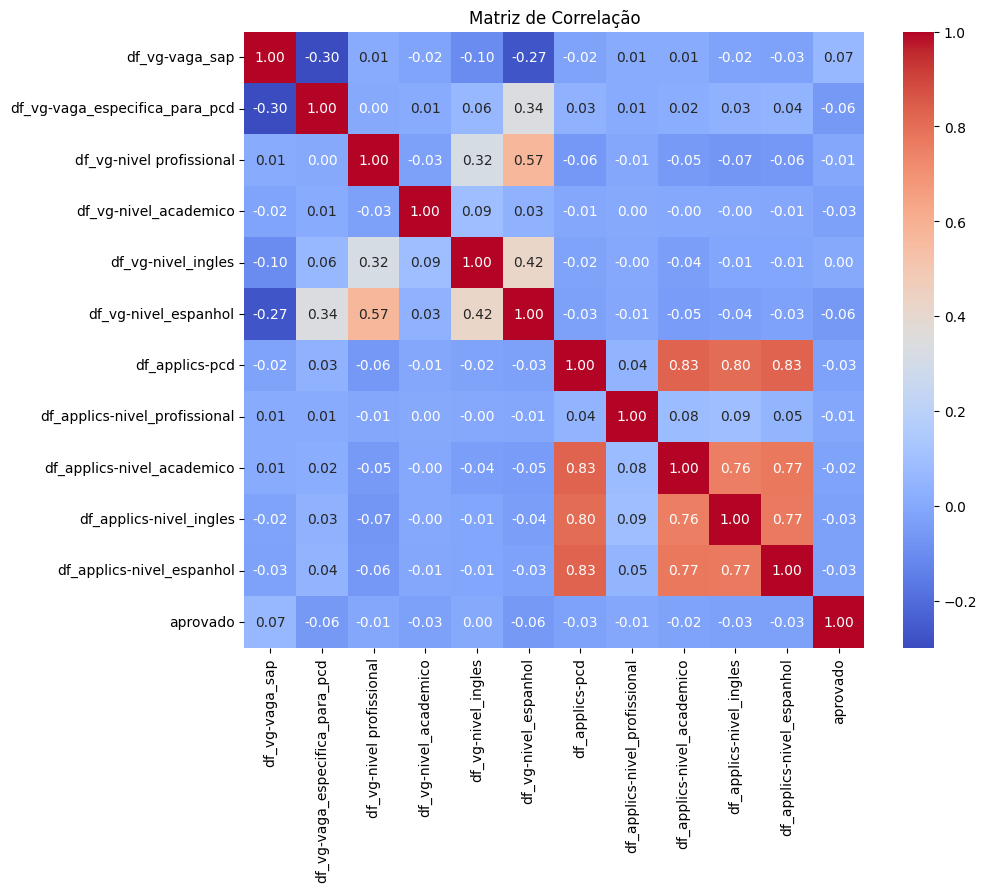

In [266]:
correlation_matrix = df_relevant_applicants_prospects_vagas_colunas_selecionadas.corr(numeric_only=True)

# Visualiza a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [270]:
df_relevant_applicants_prospects_vagas_colunas_selecionadas

,df_vg-vaga_sap,df_vg-tipo_contratacao,df_vg-vaga_especifica_para_pcd,df_vg-nivel profissional,df_vg-nivel_academico,df_vg-nivel_ingles,df_vg-nivel_espanhol,df_vg-outro_idioma,df_vg-areas_atuacao,df_vg-principais_atividades,...,df_applics-nivel_profissional,df_applics-nivel_academico,df_applics-nivel_ingles,df_applics-nivel_espanhol,df_applics-outro_idioma,df_applics-instituicao_ensino_superior,df_applics-cursos,df_applics-certificacoes,df_applics-outras_certificacoes,aprovado
0,0,Cooperado,1,5,3,2,5,,TI - Processos e Negócios-,Anallista de negócios,...,0,0,0,0,-,,,,,1
1,0,Cooperado,1,5,6,2,5,,Comercial-,Oracle Retail Senior Solution Architect / Inte...,...,0,0,0,0,-,,,,,0
2,0,Cooperado,1,5,6,2,5,,Comercial-,Oracle Retail Senior Solution Architect / Inte...,...,0,0,0,0,-,,,,,1
3,0,Cooperado,1,0,6,0,5,,Comercial-,Oracle Retail SIM specialist - SME,...,0,0,0,0,-,,,,,1
4,0,Cooperado,1,0,6,4,5,,Administrativa-,Analista desenvolvedor,...,0,0,0,0,-,,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,1,"CLT Full, PJ/Autônomo",1,11,3,0,4,,TI - Projetos-TI - SAP-,Experiência na implementação de projetos de SD...,...,0,18,4,2,-,,Química,,,1
21431,1,"CLT Full, PJ/Autônomo",1,11,3,0,4,,TI - Projetos-TI - SAP-,Experiência na implementação de projetos de SD...,...,0,0,0,0,-,,,,,1
21432,1,"CLT Full, PJ/Autônomo",1,11,3,0,4,,TI - Projetos-TI - SAP-,Experiência na implementação de projetos de SD...,...,0,0,0,0,-,,,,,1
21433,1,"CLT Full, PJ/Autônomo",1,11,3,0,4,,TI - Projetos-TI - SAP-,Experiência na implementação de projetos de SD...,...,0,0,0,0,-,,,,,1


### **Separando os dados para treinamnto**

In [271]:
X = df_relevant_applicants_prospects_vagas_colunas_selecionadas[['df_vg-vaga_sap', 'df_vg-tipo_contratacao',
       'df_vg-vaga_especifica_para_pcd', 'df_vg-nivel profissional',
       'df_vg-nivel_academico', 'df_vg-nivel_ingles',
       'df_vg-nivel_espanhol', 'df_vg-outro_idioma',
       'df_vg-areas_atuacao', 'df_vg-principais_atividades',
       'df_vg-competencia_tecnicas_e_comportamentais',
       'df_vg-habilidades_comportamentais_necessarias',
       'df_applics-titulo_profissional',
       'df_applics-objetivo_profissional', 'df_applics-pcd',
       'df_applics-area_atuacao', 'df_applics-remuneracao',
       'df_applics-conhecimentos_tecnicos', 'df_applics-cargo_atual',
       'df_applics-nivel_profissional', 'df_applics-nivel_academico',
       'df_applics-nivel_ingles', 'df_applics-nivel_espanhol',
       'df_applics-outro_idioma',
       'df_applics-instituicao_ensino_superior', 'df_applics-cursos',
       'df_applics-certificacoes', 'df_applics-outras_certificacoes']]
y = df_relevant_applicants_prospects_vagas_colunas_selecionadas['aprovado']

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [273]:
type(y_train)

pandas.core.series.Series

In [274]:
# reshape() molda uma matriz sem alterar os dados da matriz.
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [275]:
type(y_train)

numpy.ndarray

### **Contruindo a rede neural**

In [276]:
import tensorflow as tf

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

2025-07-16 13:44:40.992954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [277]:
# Semente aleatótia para manter os mesmos dados
tf.random.set_seed(7)

# Definindo entradas da rede + tamanho da batch de processamento
input_shape = X_train.shape[1]    # Variáveis de entrada
output_shape = y_train.shape[1]   # Classe preditora
batch_size = 20

# Abrindo uma sequencia de neuronios
model = models.Sequential()

# input layer
# Entrada da rede
model.add(layers.Dense(
                        batch_size
                       ,input_shape=(input_shape,)
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        12
                       ,activation='relu'))

# hidden layer
# Camada oculta
model.add(layers.Dense(
                        6
                       ,activation='relu'))


# dropout layer
# Aplicando regularização
model.add(layers.Dropout(0.5))

# output layer
# Camada de saída
model.add(layers.Dense(
                        output_shape
                       ,activation='sigmoid'))

# Configurar o otimizador Adam com uma learning rate específica
# Defina a learning rate desejada
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

# Compilar o modelo com o otimizador configurado
model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# summmary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                580       
                                                                 
 dense_1 (Dense)             (None, 12)                252       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 917 (3.58 KB)
Trainable params: 917 (3.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [278]:
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )


0epoch [00:00, ?epoch/s]

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")